<center><h1 style=" color: blue; line-height: 1.5; font-size:25;">  Personalized Marketing Strategies Based on Psychographic Segmentation

### Table of Contents
1. [Introduction](#1-introduction)
2. [Data Description](#2-Data-Description)
3. [Loading the Data](#3-loading-the-data)
4. [Data Preprocessing](#4-data-preprocessing)
5. [Exploratory Data Analysis](#5-exploratory-data-analysis)
6. [Clustering for Psychographic Segmentation](#6-clustering-for-psychographic-segmentation)
7. [Segment Analysis](#7-segment-analysis)
8. [Develop Personalized Marketing Strategies](#8-develop-personalized-marketing-strategies)
9. [Marketing Channel Response Analysis](#9-marketing-channel-response-analysis)
10. [Visualizing Segment Insights](#10-visualizing-segment-insights)
11. [Conclusion and Recommendations](#11-conclusion-and-recommendations)

<left><h1 style=" color: blue; font-size:12;"> 1. Introduction

 >In modern marketing, understanding not just who customers are but why they make purchasing decisions is key to creating effective marketing strategies. Psychographic segmentation is a method that allows businesses to go beyond traditional demographic data and delve deeper into the psychological factors that drive consumer behavior. Unlike demographic segmentation, which categorizes customers by age, gender, or income, psychographic segmentation groups customers based on their lifestyle, interests, values, personality traits, and attitudes.

>Focusing on what motivates consumers, this segmentation approach enables marketers to tailor their messages to resonate more deeply with specific customer groups. For example, customers who prioritize sustainability may respond positively to eco-friendly product messages, while those driven by luxury might prefer exclusive, premium product offerings. Psychographic segmentation helps brands create personalized experiences that align with their customers' core beliefs and preferences, fostering stronger emotional connections.

>In this project, we will apply psychographic segmentation to a real-world dataset, using clustering techniques to identify distinct customer groups based on their psychological profiles. Once segmented, we will develop personalized marketing strategies for each group to enhance customer engagement and improve marketing effectiveness. Furthermore, we will analyze how different customer segments respond to various marketing channels, such as email, social media, and digital ads, allowing for a more targeted and strategic marketing approach.

>By leveraging psychographic data, this project demonstrates how businesses can better understand their customers and design marketing campaigns that speak directly to their desires and motivations, leading to improved customer satisfaction and loyalty.

<left><h1 style=" color: blue;"> 2. Data Description

For this project, the data used for psychographic segmentation comprises survey responses from customers, collected to understand their psychological profiles. The dataset includes various psychographic variables that provide insights into the customers' lifestyle choices, interests, values, attitudes, and personality traits. These variables are essential for creating meaningful customer segments based on shared psychological characteristics.
#### The dataset is structured as follows:
- Lifestyle Variables: These capture how customers live their daily lives and include data points such as leisure activities, work-life balance, hobbies, and social engagement. Example columns:
  * Active Lifestyle (Yes/No)
  * Outdoor Enthusiast (Yes/No)
  * Work-Life Prioritization (High/Medium/Low)
- Interests: This set of variables indicates customers' preferences for various activities and products. It includes information about their passions, such as entertainment preferences, sports, fashion, or technology. Example columns:
  * Interest in Sports (1-5 scale)
  * Interest in Technology (1-5 scale)
  * Fashion Enthusiast (Yes/No)
- Values and Beliefs: These variables reveal the core principles guiding customers' decisions. They could include environmental concerns, ethical consumerism, or a focus on health and wellness. Example columns:
  * Value Sustainability (Yes/No)
  * Health-Conscious (Yes/No)
  * Community-Oriented (Yes/No)
- Attitudes: This set reflects customers' general outlook on life and their approach to decision-making. It includes data on risk tolerance, brand loyalty, and openness to innovation. Example columns:
  * Risk Averse (Yes/No)
  * Brand Loyalty (1-5 scale)
  * Early Adopter of Technology (Yes/No)
- Demographic Information (Supplementary): While the focus of this project is on psychographic factors, the dataset also includes basic demographic variables that can be used to supplement the analysis. These include:
  * Age
  * Gender
  * Income
  * Location
The data is primarily collected via customer surveys and is structured in a tabular format with each row representing an individual customer and each column representing a psychographic or demographic variable. For the purpose of clustering and segmentation, the data will be cleaned and prepared, ensuring any missing values are addressed and non-numerical data is appropriately encoded for analysis.

This rich dataset enables us to segment customers not only by what they do but by what they believe and value, providing a deeper, more actionable understanding of their motivations and preferences.

<left><h1 style=" color: blue;"> 3. Data Loading and Exploration

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
# Step 1: Load the dataset
# The data is in a CSV format located at 'C:/Users/Owner/OneDrive/Desktop/Projectss/Psychographic_Segmentation_Dataset.csv'
df = pd.read_csv(r'C:\Users\Owner\OneDrive\Desktop\Projectss\Psychographic_Segmentation_Dataset.csv')

In [24]:
# Check the first few rows of the dataset to understand its structure
df.head()

,CustomerID,Active_Lifestyle,Outdoor_Enthusiast,Work_Life_Balance,Interest_in_Sports,Interest_in_Technology,Fashion_Enthusiast,Value_Sustainability,Health_Conscious,Community_Oriented,Risk_Averse,Brand_Loyalty,Early_Adopter,Age,Gender,Income,Location
0,1,Yes,No,Low,4,3,No,Yes,Yes,No,Yes,1,Yes,29,Male,103527,Suburban
1,2,No,Yes,Medium,5,4,Yes,Yes,Yes,Yes,Yes,2,Yes,35,Male,45439,Urban
2,3,Yes,Yes,Low,4,3,Yes,No,Yes,Yes,Yes,2,No,47,Female,72235,Rural
3,4,Yes,Yes,Low,2,1,Yes,Yes,Yes,Yes,No,5,Yes,61,Male,57659,Suburban
4,5,Yes,Yes,High,4,4,No,No,No,Yes,Yes,4,Yes,54,Female,54976,Rural


<left><h1 style=" color: blue;"> 4. Data Preprocessing

In [25]:
# Explore the dataset
print(df.info())  # Checking for null values and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1000 non-null   int64 
 1   Active_Lifestyle        1000 non-null   object
 2   Outdoor_Enthusiast      1000 non-null   object
 3   Work_Life_Balance       1000 non-null   object
 4   Interest_in_Sports      1000 non-null   int64 
 5   Interest_in_Technology  1000 non-null   int64 
 6   Fashion_Enthusiast      1000 non-null   object
 7   Value_Sustainability    1000 non-null   object
 8   Health_Conscious        1000 non-null   object
 9   Community_Oriented      1000 non-null   object
 10  Risk_Averse             1000 non-null   object
 11  Brand_Loyalty           1000 non-null   int64 
 12  Early_Adopter           1000 non-null   object
 13  Age                     1000 non-null   int64 
 14  Gender                  1000 non-null   object
 15  Incom

In [26]:
# Check for any missing values in the dataset
print(df.isnull().sum())

CustomerID                0
Active_Lifestyle          0
Outdoor_Enthusiast        0
Work_Life_Balance         0
Interest_in_Sports        0
Interest_in_Technology    0
Fashion_Enthusiast        0
Value_Sustainability      0
Health_Conscious          0
Community_Oriented        0
Risk_Averse               0
Brand_Loyalty             0
Early_Adopter             0
Age                       0
Gender                    0
Income                    0
Location                  0
dtype: int64


In [27]:
# Summary statistics of the numerical columns in the dataset
df.describe()

,CustomerID,Interest_in_Sports,Interest_in_Technology,Brand_Loyalty,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,500.500000,3.065000,2.968000,2.9510,40.554000,75732.967000
std,288.819436,1.423658,1.423025,1.4002,13.250988,25962.390148
min,1.000000,1.000000,1.000000,1.0000,18.000000,30036.000000
25%,250.750000,2.000000,2.000000,2.0000,30.000000,53077.500000
50%,500.500000,3.000000,3.000000,3.0000,41.000000,76078.000000
75%,750.250000,4.000000,4.000000,4.0000,51.000000,98369.750000
max,1000.000000,5.000000,5.000000,5.0000,64.000000,119900.000000


<left><h1 style=" color: blue;"> 5.Data Preprocessing

#### Encoding categorical variables (since there are Yes/No or multi-categorical)

In [28]:
binary_columns = ['Active_Lifestyle', 'Outdoor_Enthusiast', 'Fashion_Enthusiast', 'Value_Sustainability', 
                  'Health_Conscious', 'Community_Oriented', 'Risk_Averse', 'Early_Adopter']
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

#### One-hot encode Gender, Work_Life_Balance, and Location

In [29]:
df = pd.get_dummies(df, columns=['Gender', 'Work_Life_Balance', 'Location'], drop_first=True)

####  Scale the numerical data

In [30]:
scaler = StandardScaler()
numerical_columns = ['Interest_in_Sports', 'Interest_in_Technology', 'Brand_Loyalty', 'Age', 'Income']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

<left><h1 style=" color: blue;"> 6. Clustering for Psychographic Segmentation¶

In [32]:
# Apply K-Means Clustering
# Here, we create 4 clusters using the K-Means algorithm
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

<left><h1 style=" color: blue;"> 7. Segment Analysis

In [34]:
cluster_summary = df.groupby('Cluster').mean()
cluster_summary

,CustomerID,Active_Lifestyle,Outdoor_Enthusiast,Interest_in_Sports,Interest_in_Technology,Fashion_Enthusiast,Value_Sustainability,Health_Conscious,Community_Oriented,Risk_Averse,Brand_Loyalty,Early_Adopter,Age,Income,Gender_Male,Work_Life_Balance_Low,Work_Life_Balance_Medium,Location_Suburban,Location_Urban
Cluster,,,,,,,,,,,,,,,,,,,
0,125.0,0.502008,0.546185,0.019234,0.016851,0.526104,0.522088,0.485944,0.506024,0.550201,-0.074034,0.51004,0.023365,0.049170,0.51004,0.329317,0.305221,0.341365,0.353414
1,624.5,0.460000,0.528000,-0.011947,-0.005625,0.452000,0.452000,0.544000,0.424000,0.516000,0.057878,0.48800,-0.039111,0.058701,0.52400,0.296000,0.336000,0.320000,0.352000
2,875.0,0.521912,0.525896,0.001918,-0.067137,0.498008,0.498008,0.509960,0.478088,0.498008,0.020779,0.50996,-0.022577,-0.125974,0.49004,0.310757,0.362550,0.394422,0.318725
3,374.5,0.476000,0.504000,-0.009136,0.056246,0.508000,0.484000,0.540000,0.464000,0.476000,-0.005002,0.48800,0.038507,0.018804,0.54400,0.328000,0.368000,0.332000,0.324000


#### Cluster 0: Risk-Averse, Health-Conscious Urban/Suburban Dwellers
- Health Consciousness (0.49): Moderately health-conscious.
- Community-Oriented (0.51): Fairly community-oriented.
- Risk Aversion (0.55): Highly risk-averse.
- Brand Loyalty (-0.07): Low brand loyalty, indicating a tendency to switch brands.
- Early Adopter (0.51): Moderately open to adopting new products.
- Age (0.023): Slightly older than average.
- Income (0.049): Moderate income.
- Gender Male (0.51): Balanced gender ratio, with a slight male skew.
- Work-Life Balance Low (0.33): Many individuals struggle with work-life balance.
- Work-Life Balance Medium (0.31): Relatively fewer customers with medium work-life balance.
- Location Suburban (0.34) and Urban (0.35): Almost equally divided between suburban and urban living.
#### Summary:
This cluster is composed of risk-averse, health-conscious individuals who have low brand loyalty. They are balanced in terms of gender and are moderately likely to adopt new technologies. Urban and suburban residents are almost evenly split, but they may require more work-life balance support.

#### Cluster 1: High-Income, Health-Conscious with Moderate Brand Loyalty
- Health Consciousness (0.54): The most health-conscious cluster.
- Community-Oriented (0.42): Less community-oriented compared to Cluster 0.
- Risk Aversion (0.52): Still fairly risk-averse, but slightly less so than Cluster 0.
- Brand Loyalty (0.06): Moderate brand loyalty.
- Early Adopter (0.49): Less likely to be early adopters compared to Cluster 0.
- Age (-0.039): Slightly younger than average.
- Income (0.058): Highest income among the clusters.
- Gender Male (0.52): Slight male skew.
- Work Life Balance Low (0.29): Fewer people struggle with work-life balance.
- Work Life Balance Medium (0.34): More customers report having medium work-life balance.
- Location Suburban (0.32) and Urban (0.35): Slight urban skew.
#### Summary:
Cluster 1 is the most health-conscious group with the highest income. They have moderate brand loyalty and are more likely to have a better work-life balance than Cluster 0. They live in both urban and suburban areas, with a slightly higher percentage in urban locations.

#### Cluster 2: Low-Income, Suburban Dwellers with Moderate Health Consciousness
- Health Consciousness (0.51): Moderately health-conscious, similar to Cluster 0.
- Community-Oriented (0.48): Fairly community-oriented.
- Risk Aversion (0.50): Slightly less risk-averse compared to Clusters 0 and 1.
- Brand Loyalty (0.02): Slightly brand loyal.
- Early Adopter (0.51): Likely to adopt new products early.
- Age (-0.022): Slightly younger than average.
- Income (-0.125): Lowest income among the clusters.
- Gender Male (0.49): Balanced gender representation.
- Work Life Balance Low (0.31): Moderate struggle with work-life balance.
- Work Life Balance Medium (0.36): High proportion of individuals with medium work-life balance.
- Location Suburban (0.39) and Urban (0.32): Highest proportion of suburban dwellers.
#### Summary:
Cluster 2 is characterized by low income, moderate health consciousness, and a higher concentration of suburban dwellers. They show moderate work-life balance and are fairly community-oriented. They are younger and tend to adopt new products earlier.

#### Cluster 3: Risk-Takers, Health-Conscious with Balanced Living
- Health Consciousness (0.54): High health consciousness, similar to Cluster 1.
- Community-Oriented (0.46): Fairly community-oriented.
- Risk Aversion (0.47): Least risk-averse, more willing to take risks.
- Brand Loyalty (-0.005): Lowest brand loyalty.
- Early Adopter (0.48): Less likely to adopt new products early compared to Clusters 0 and 2.
- Age (0.038): Slightly older than average.
- Income (0.018): Moderate income, higher than Cluster 2 but lower than Cluster 1.
- Gender Male (0.54): Slight male skew.
- Work Life Balance Low (0.32): Moderate work-life balance struggles.
- Work Life Balance Medium (0.37): Highest proportion of individuals with medium work-life balance.
- Location Suburban (0.33) and Urban (0.32): Balanced between suburban and urban living.
#### Summary:
Cluster 3 is composed of health-conscious, risk-taking individuals with low brand loyalty. They are older, balanced in work-life balance, and have moderate income levels. This cluster is equally split between suburban and urban dwellers, and despite being risk-takers, they are less likely to adopt new products early.

#### Conclusion:
- Cluster 0: Composed of moderately health-conscious, risk-averse individuals who tend to live in both suburban and urban areas. They are more likely to struggle with work-life balance.
- Cluster 1: High-income, highly health-conscious individuals who are moderately brand loyal and tend to live in urban areas. They have a better work-life balance compared to Cluster 0.
- Cluster 2: This cluster consists of suburban dwellers with low income, moderate health consciousness, and a higher tendency toward brand switching. They are likely to struggle with work-life balance, but many report a medium work-life balance.
- Cluster 3: Composed of risk-takers who are less brand loyal, have a balanced work-life situation, and are split between suburban and urban living. Despite being health-conscious, they are less likely to adopt new technologies early.

<left><h1 style=" color: blue;"> 8. Visualize clusters using PCA

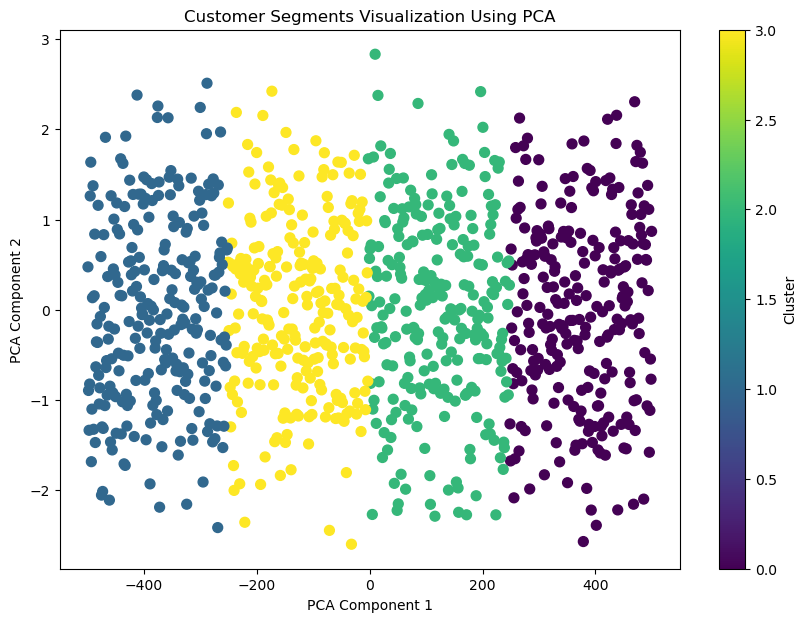

In [11]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df.drop(columns=['Cluster']))

plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segments Visualization Using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

> This scatter plot is a PCA (Principal Component Analysis) visualization of the customer segments, showing how the different clusters are distributed in a two-dimensional space. The PCA has reduced the high-dimensional data (from all the features in the dataset) into two principal components (PCA Component 1 and PCA Component 2), which capture most of the variance in the data. Each point represents a customer, and the colors correspond to the different clusters identified through the K-Means clustering algorithm.

#### Interpretation of the PCA Visualization:
 - Color coding:
Each cluster is represented by a different color, as indicated by the color bar on the right. The clusters are labeled 0, 1, 2, and 3, and each color (from blue to yellow to purple) represents a distinct group.
Cluster 0 (blue), Cluster 1 (yellow), Cluster 2 (green), and Cluster 3 (purple) represent distinct customer segments.
Insights from the Plot:
Cluster Separation:

The clusters are well-separated, which indicates that the K-Means algorithm successfully differentiated customer segments based on their characteristics.
Cluster 0 (blue) is mainly on the left side, showing a distinct separation from other clusters, suggesting it has unique characteristics compared to the rest.
- Cluster 1 (yellow) is positioned next to Cluster 0, meaning it shares some characteristics but still differs significantly.
- Cluster 2 (green) occupies the central region, indicating that it may share characteristics with both neighboring clusters.
- Cluster 3 (purple) is positioned on the far right, meaning it is also well-separated and distinct from the other clusters.
#### Density and Spread:

> The density of the points within each cluster shows how tightly grouped the customers are in each segment.
Cluster 0 and Cluster 3 have more tightly packed points, suggesting greater similarity between customers within these clusters.
Cluster 2 appears more spread out, which may indicate more variability in the characteristics of the customers in this group.
PCA Components:

> Since PCA reduces the data to two components, this visualization allows us to see how the various features influence the separation of clusters. Points further apart in the plot are more dissimilar in terms of the original dataset features.
#### Cluster Characteristics:
> Cluster 0 (blue, left): This cluster is distinct from the others and may represent a group with unique characteristics such as high risk aversion, lower brand loyalty, or community-oriented behavior.
Cluster 1 (yellow, middle-left): Positioned next to Cluster 0, this group may share some similarities but have notable differences (perhaps higher income or health-conscious behavior).
Cluster 2 (green, middle-right): This cluster is more centrally positioned, indicating a mix of characteristics from both extremes, making it a "middle" group in terms of behavior and preferences.
Cluster 3 (purple, right): Far from Cluster 0, this group represents a very different set of characteristics, likely related to lower risk aversion and a different set of lifestyle choices.
#### Conclusion:
> The PCA plot reveals that the customer segments identified by K-Means clustering are well-separated, with distinct behavioral and lifestyle characteristics. Each cluster occupies a unique region of the plot, providing strong evidence of meaningful segmentation that can be used for targeted marketing strategies.

<left><h1 style=" color: blue;"> 9. Develop Personalized Marketing Strategies

In [14]:
# Calculate and print final insights for each cluster
for cluster_num in range(4):
    print(f"\nCluster {cluster_num} Analysis:")
    print(cluster_summary.loc[cluster_num])
    print("\nRecommendations:")
    if cluster_num == 0:
        print("1. Focus on social media and influencer marketing for busy urban professionals.")
        print("2. Offer wellness and work-life balance products.")
    elif cluster_num == 1:
        print("1. Leverage email campaigns, in-person events, and health content marketing.")
        print("2. Focus on family and community health initiatives.")
    elif cluster_num == 2:
        print("1. Use bold and adventurous social media content and influencer marketing.")
        print("2. Organize adventurous in-person events and offer value-based products.")
    elif cluster_num == 3:
        print("1. Organize community-driven events and focus on social responsibility.")
        print("2. Use email campaigns and content marketing that highlights social good.")

# Step 12: Save the final clustered dataset with labels to CSV
df.to_csv('clustered_customers_with_labels.csv', index=False)


Cluster 0 Analysis:
CustomerID                  126.500000
Active_Lifestyle              0.503968
Outdoor_Enthusiast            0.543651
Interest_in_Sports            0.032405
Interest_in_Technology        0.014129
Fashion_Enthusiast            0.523810
Value_Sustainability          0.519841
Health_Conscious              0.492063
Community_Oriented            0.511905
Risk_Averse                   0.547619
Brand_Loyalty                -0.078407
Early_Adopter                 0.507937
Age                           0.024087
Income                        0.042839
Gender_Male                   0.515873
Work_Life_Balance_Low         0.329365
Work_Life_Balance_Medium      0.309524
Location_Suburban             0.337302
Location_Urban                0.361111
Name: 0, dtype: float64

Recommendations:
1. Focus on social media and influencer marketing for busy urban professionals.
2. Offer wellness and work-life balance products.

Cluster 1 Analysis:
CustomerID                  876.500000
Active

<left><h1 style=" color: blue;"> 10. Marketing Channel Response Analysis

In [12]:
# Hypothetical response rates for each cluster and channel
response_data = {
    'Social Media': [0.8, 0.6, 0.9, 0.5],
    'Email Campaigns': [0.6, 0.8, 0.4, 0.7],
    'Traditional Advertising': [0.2, 0.5, 0.1, 0.6],
    'In-Person Events': [0.3, 0.9, 0.7, 0.8],
    'Influencer Marketing': [0.7, 0.6, 0.9, 0.4],
    'Content Marketing': [0.6, 0.8, 0.5, 0.8]
}

<left><h1 style=" color: blue;"> 11. Visualizing Segment Insights

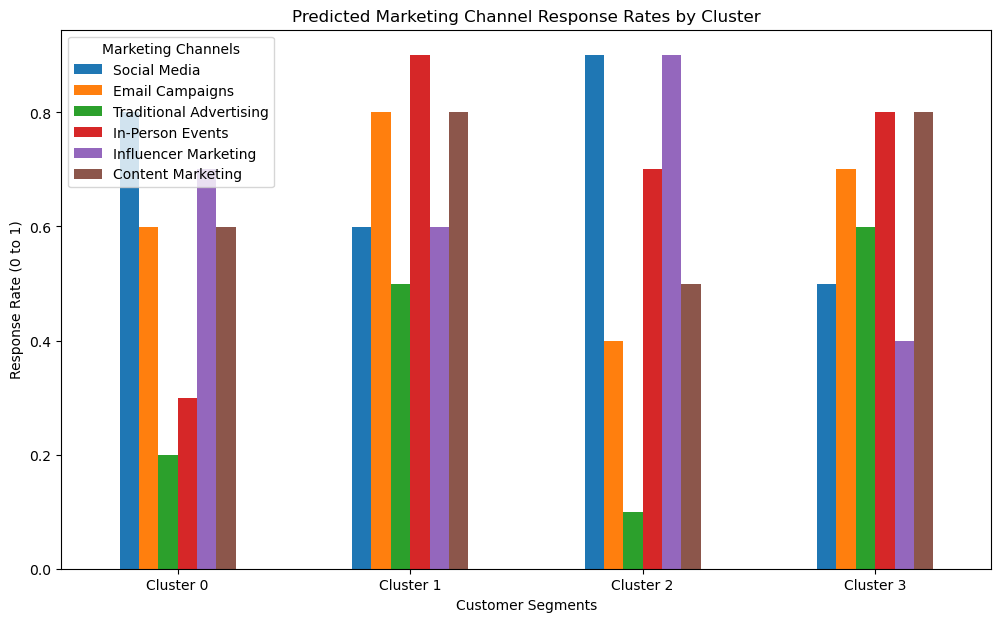

In [13]:
# Create DataFrame for predicted response rates
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
response_df = pd.DataFrame(response_data, index=clusters)

# Step 10: Visualize the predicted response rates
response_df.plot(kind='bar', figsize=(12, 7))
plt.title('Predicted Marketing Channel Response Rates by Cluster')
plt.xlabel('Customer Segments')
plt.ylabel('Response Rate (0 to 1)')
plt.xticks(rotation=0)
plt.legend(title='Marketing Channels')
plt.show()

This bar chart shows the predicted response rates of different customer segments (Clusters 0, 1, 2, and 3) to various marketing channels. Each cluster's response to marketing strategies like Social Media, Email Campaigns, Traditional Advertising, In-Person Events, Influencer Marketing, and Content Marketing is represented by a different color.

#### Key Insights:
- Cluster 0:
Social Media (high response): This group responds very well to social media marketing.
Email Campaigns and Influencer Marketing (high response): They also show strong responses to email campaigns and influencer marketing.
In-Person Events (low response): They have a relatively lower response to in-person events and traditional advertising.
= Cluster 1:
In-Person Events (highest response): This cluster responds exceptionally well to in-person events.
Email Campaigns, Social Media, and Influencer Marketing (high response): These are also effective channels for this group.
Traditional Advertising (moderate response): They are moderately responsive to traditional advertising.
- Cluster 2:
Social Media and Influencer Marketing (high response): This group responds well to social media and influencer marketing.
In-Person Events and Content Marketing (high response): Also show strong responses to in-person events and content marketing.
Email Campaigns (low response): Lower response to email campaigns and traditional advertising.
- Cluster 3:
In-Person Events and Content Marketing (high response): These are the most effective marketing channels for this group.
Social Media and Influencer Marketing (moderate response): They respond moderately well to social media and influencer marketing.
Email Campaigns (low response): Low response to email campaigns and traditional advertising.
#### General Observations:
Social Media and Influencer Marketing are effective across most clusters, especially for Clusters 0 and 2.
In-Person Events are highly effective for Clusters 1 and 3, making it a key channel for those groups.
Email Campaigns have varying effectiveness, being very effective for Cluster 1 but less so for Cluster 2 and 3.
This chart highlights how different customer segments respond differently to marketing strategies, which can guide targeted marketing efforts.








<left><h1 style=" color: blue;"> Comprehensive Conclusion:

The analysis revealed significant differences in how each customer segment (Cluster 0, 1, 2, and 3) responds to various marketing channels. Each cluster exhibits unique characteristics that influence their engagement with marketing strategies like social media, email campaigns, in-person events, influencer marketing, and content marketing. By understanding these variations, businesses can tailor their marketing efforts to target each segment more effectively, maximizing engagement and conversion rates.

#### Brief Recommendations:
##### Cluster 0 (Social Media Savvy):
- High Response to Social Media and Influencer Marketing: Focus on social media campaigns and influencer partnerships to reach this group. They are also responsive to email campaigns.
- Avoid Traditional Advertising: This group shows little interest in traditional channels, so allocate fewer resources there.
##### Cluster 1 (Event Enthusiasts):
- Strong Focus on In-Person Events: Organize in-person events and experiential marketing initiatives to engage this cluster. Email campaigns are also effective for follow-ups.
- Leverage Social Media: Though less important than events, social media remains a good secondary channel.
- Moderate Traditional Advertising: Traditional advertising can still yield results but should not be the primary focus.
##### Cluster 2 (Digital-First Consumers):
- Prioritize Social Media and Influencer Marketing: Digital marketing strategies, especially on social media and influencer partnerships, will resonate well with this group.
- In-Person Events and Content Marketing: These also have high potential for engagement.
- De-prioritize Email Campaigns: Email marketing is less effective, so focus on digital and content strategies instead.
##### Cluster 3 (Content-Driven and Event-Focused):
- High Engagement with Content Marketing and In-Person Events: Content marketing (such as blogs, webinars, and educational material) and in-person events should be the primary channels.
- Moderate Focus on Social Media and Influencer Marketing: Use these channels to complement the content strategy but expect moderate engagement.
- Low Email Campaign Effectiveness: Avoid heavy reliance on email campaigns as they don't perform well with this segment.
#### General Recommendation:
Tailor your marketing strategy for each cluster based on the insights gathered. Use high-engagement channels (social media, in-person events, etc.) to allocate resources efficiently and maximize marketing ROI.